In [1]:
# Import necessary packages
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Define file path for storing cleaned data
file_path = "/Users/maxwellcozean/Desktop/ECON 1680/Machine Learning Project/Data"

# Define file path for storing figures
output_path = "/Users/maxwellcozean/Desktop/ECON 1680/Machine Learning Project/Output"

# Join paths and import csv as dataframe
df = pd.read_csv(os.path.join(file_path,"Most-Recent-Cohorts-Institution_cleaned.csv"),
                 encoding='utf-8',low_memory=False)

In [3]:
# Remove rows with negative observations
df = df[(df >= 0).all(axis=1)]

# Calculate updated summary statistics
df.describe()

,PREDDEG,CONTROL,LOCALE,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,...,INEXPFTE,AVGFACSAL,PCTPELL,PCTFLOAN,CDR2,PAR_ED_PCT_PS,GRAD_DEBT_MDN,MD_FAMINC,MD_EARN_WNE_P6,MD_EARN_WNE_P8
count,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,...,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000
mean,2.038493,1.968598,20.223865,2856.581625,0.469076,0.174944,0.194980,0.040199,0.011994,0.003586,...,9079.861648,7070.047395,0.424410,0.429523,0.086615,0.567115,15502.104044,31431.875961,35740.349916,38523.173909
std,0.955196,0.832975,9.765432,6212.324319,0.261628,0.202955,0.209508,0.063871,0.057185,0.017780,...,9246.436144,2461.098471,0.198083,0.262336,0.068222,0.126351,7203.209242,20177.984779,13337.627889,14735.776327
min,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.189252,2819.000000,0.000000,9040.000000,9518.000000
25%,1.000000,1.000000,12.000000,174.000000,0.256400,0.044100,0.053575,0.006600,0.000000,0.000000,...,4568.000000,5328.632352,0.276968,0.205775,0.036000,0.475938,9500.000000,17791.750000,26741.750000,28351.683545
50%,2.000000,2.000000,21.000000,812.000000,0.487250,0.097300,0.117850,0.018600,0.002700,0.000800,...,7147.000000,6582.554813,0.398000,0.461500,0.076000,0.548792,13080.067390,24735.000000,33603.541253,36049.500000
75%,3.000000,3.000000,23.000000,2718.250000,0.682350,0.226725,0.268700,0.045900,0.007700,0.003100,...,10688.500000,8311.500000,0.555450,0.633550,0.127000,0.649950,21500.000000,39127.000000,42452.500000,46011.000000
max,4.000000,3.000000,43.000000,138138.000000,1.000000,1.000000,1.000000,0.785700,1.000000,0.877800,...,201675.000000,22761.000000,1.000000,1.000000,1.000000,1.195141,44959.112059,179864.000000,147347.000000,134883.000000


In [4]:
# Specify output variable
y = df['CDR2']

# Specify input variables
X = df.drop(columns=['CDR2'])

# Create training and testing splits of the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1680)

In [5]:
# Run a preliminary OLS regression on the training data
olsReg = sm.OLS(y_train, X_train).fit()

# Run OLS model on testing set
y_pred = olsReg.predict(X_test)

# Calculate MSE
ols_MSE = mean_squared_error(y_test, y_pred)

# Produce summary statistics for preliminary OLS regression
print(olsReg.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CDR2   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.695
Method:                 Least Squares   F-statistic:                              429.2
Date:                Sat, 11 May 2024   Prob (F-statistic):                        0.00
Time:                        16:29:29   Log-Likelihood:                          5512.4
No. Observations:                3948   AIC:                                 -1.098e+04
Df Residuals:                    3927   BIC:                                 -1.085e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [6]:
# Scale coefficients by 100 
scaled_coeffs = [coef * 100 for coef in olsReg.params.tolist()]

# Generate dataframe to store results from OLS and shrinkage methods
df_results = pd.DataFrame({'Variable':X.columns, 'Coeff OLS':scaled_coeffs})

# Print results dataframe
print(df_results)

          Variable  Coeff OLS
0          PREDDEG  -1.010483
1          CONTROL  -0.072791
2           LOCALE   0.084078
3             UGDS   0.000043
4       UGDS_WHITE   5.377494
5       UGDS_BLACK   7.539481
6        UGDS_HISP   9.045844
7       UGDS_ASIAN  -0.237455
8        UGDS_AIAN  -1.527347
9        UGDS_NHPI   6.887029
10        PPTUG_EF   2.343147
11            COST  -0.000011
12        INEXPFTE  -0.000064
13       AVGFACSAL   0.000499
14         PCTPELL   0.989266
15        PCTFLOAN   3.368508
16   PAR_ED_PCT_PS   5.387189
17   GRAD_DEBT_MDN   0.000061
18       MD_FAMINC  -0.000083
19  MD_EARN_WNE_P6   0.000054
20  MD_EARN_WNE_P8  -0.000132


In [7]:
# Construct vector of alpha values
alphas = np.linspace(1e-6, 1, num=50)

# Construct vector to store mean prediction errors
cv_errors = []

# Construct vector to store coefficients
coefs = []

# Set MSE at 10
MSE = 10

# Set best alpha at 0
bestalpha = 0

# Loop for running LASSO regression for different values of alpha
for a in alphas:
    
    # Define pipeline object
    lassoReg = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha = a * np.sqrt(X_train.shape[0])))
    
    # Run LASSO regression
    lassoReg.fit(X_train, y_train)
    
    # Obtain predicted values of output
    y_pred = lassoReg.predict(X_test)
    
    # Compute mean squared error
    cv_errors.append(mean_squared_error(y_test, y_pred))
    
    # Store coefficients
    coefs.append(lassoReg['lasso'].coef_)
    
    # Store value of alpha that minimizes the mean squared error
    if mean_squared_error(y_test, y_pred) < MSE:
        
        # Calculate MSE
        MSE = mean_squared_error(y_test, y_pred)
        
        # Set best alpha to a
        bestalpha = a
        
# Define MSE as lasso_MSE
lasso_MSE = MSE
        
# Run LASSO regression with best alpha
lassoReg = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha = bestalpha * np.sqrt(X_train.shape[0])))

# Fit LASSO regression to training data
lassoReg.fit(X_train, y_train)

# Add LASSO coefficients to dataframe
df_results['Coeff LASSO'] = [coef * 100 for coef in lassoReg['lasso'].coef_]

# Print df_results to check that coefficients were added to dataframe
print(df_results)

          Variable  Coeff OLS  Coeff LASSO
0          PREDDEG  -1.010483    -0.914997
1          CONTROL  -0.072791    -0.957269
2           LOCALE   0.084078     0.298697
3             UGDS   0.000043     0.196953
4       UGDS_WHITE   5.377494    -0.540676
5       UGDS_BLACK   7.539481     0.066272
6        UGDS_HISP   9.045844     0.346371
7       UGDS_ASIAN  -0.237455    -0.401140
8        UGDS_AIAN  -1.527347    -0.442187
9        UGDS_NHPI   6.887029    -0.072569
10        PPTUG_EF   2.343147     0.204314
11            COST  -0.000011    -0.151583
12        INEXPFTE  -0.000064    -0.524283
13       AVGFACSAL   0.000499     0.542062
14         PCTPELL   0.989266    -0.348381
15        PCTFLOAN   3.368508     1.026031
16   PAR_ED_PCT_PS   5.387189    -0.580337
17   GRAD_DEBT_MDN   0.000061     0.327480
18       MD_FAMINC  -0.000083    -0.910315
19  MD_EARN_WNE_P6   0.000054     0.078817
20  MD_EARN_WNE_P8  -0.000132    -1.602078


In [8]:
# Construct vector of alpha values
alphas = np.linspace(1e-6, 1, num=50)

# Construct vector to store mean prediction errors
cv_errors = []

# Construct vector to store coefficients
coefs = []

# Set MSE at 10
MSE = 10

# Set best alpha at 0
bestalpha = 0

# Loop for running ridge regression for different values of alpha
for a in alphas:
    
    # Define pipeline object
    ridgeReg = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha = a * X_train.shape[0]))
    
    # Run Ridge regression
    ridgeReg.fit(X_train, y_train)
    
    # Obtain predicted values of output
    y_pred = ridgeReg.predict(X_test)
    
    # Compute mean squared error
    cv_errors.append(mean_squared_error(y_test, y_pred))
    
    # Store coefficients
    coefs.append(ridgeReg['ridge'].coef_)
    
    # Store value of alpha that minimizes the mean squared error
    if mean_squared_error(y_test, y_pred) < MSE: 
        
        # Calculate MSE
        MSE = mean_squared_error(y_test, y_pred)
        
        # Set best alpha to a
        bestalpha = a
        
# Define MSE as ridge_MSE
ridge_MSE = MSE

# Run Ridge regression with best alpha
ridgeReg = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha = bestalpha * X_train.shape[0]))

# Fit ridge regression to training data
ridgeReg.fit(X_train, y_train)

# Add scaled ridge coefficients to dataframe 
df_results['Coeff Ridge'] = [coef * 100 for coef in ridgeReg['ridge'].coef_]

# Print data_results to check that coefficients were added to dataframe
print(df_results)

          Variable  Coeff OLS  Coeff LASSO  Coeff Ridge
0          PREDDEG  -1.010483    -0.914997    -0.883925
1          CONTROL  -0.072791    -0.957269    -0.884213
2           LOCALE   0.084078     0.298697     0.304678
3             UGDS   0.000043     0.196953     0.203216
4       UGDS_WHITE   5.377494    -0.540676    -0.501876
5       UGDS_BLACK   7.539481     0.066272     0.106195
6        UGDS_HISP   9.045844     0.346371     0.364334
7       UGDS_ASIAN  -0.237455    -0.401140    -0.392323
8        UGDS_AIAN  -1.527347    -0.442187    -0.431567
9        UGDS_NHPI   6.887029    -0.072569    -0.074553
10        PPTUG_EF   2.343147     0.204314     0.212525
11            COST  -0.000011    -0.151583    -0.203159
12        INEXPFTE  -0.000064    -0.524283    -0.502772
13       AVGFACSAL   0.000499     0.542062     0.493224
14         PCTPELL   0.989266    -0.348381    -0.319575
15        PCTFLOAN   3.368508     1.026031     0.969264
16   PAR_ED_PCT_PS   5.387189    -0.580337    -0

In [9]:
# Generate dataframe to store MSE from models
df_MSE = pd.DataFrame({'Model':['OLS','LASSO','Ridge'], 'MSE':[ols_MSE,lasso_MSE,ridge_MSE]})

# Print df_MSE
print(df_MSE)

   Model       MSE
0    OLS  0.004571
1  LASSO  0.004396
2  Ridge  0.004397


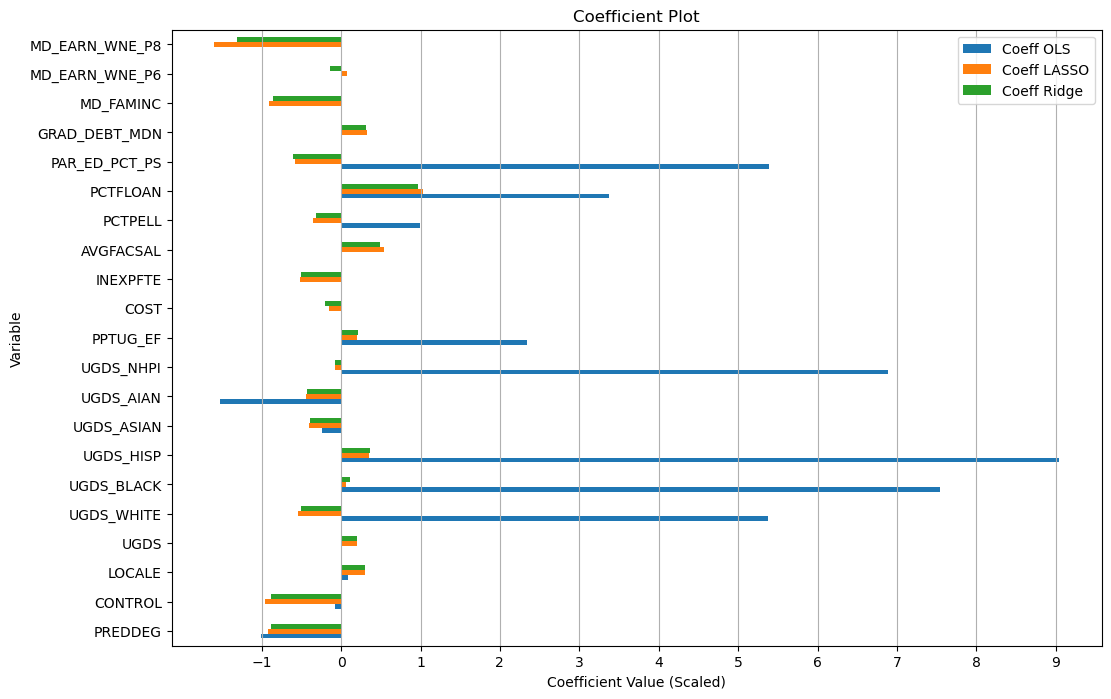

In [10]:
# Set index of df_results as variable names
df_results.set_index('Variable', inplace=True)

# Generate coefficient plot for df_results
df_results.plot(kind='barh', figsize=(12, 8))

# Add x-axis label
plt.xlabel('Coefficient Value (Scaled)')

# Add y-axis label
plt.ylabel('Variable')

# Add title
plt.title('Coefficient Plot')

# Keep x-axis grid
plt.grid(axis='x')

# Set range for plotting x-axis ticks
plt.xticks(range(-1, 10))

# Save figure in output path
plt.savefig(os.path.join(output_path,"coefficientplot.png"))

# Show plot
plt.show()